## Lab Exercise: Machine Learning for Social Sciences

### Objective: Predicting Political Party Affiliation using the k-Nearest Neighbors (k-NN) Algorithm.

#### 1. Learning Goals
Welcome! In this lab, you will get hands-on experience with a real-world machine learning task. By the end of this exercise, you will be able to:

•	Load and inspect a real-world dataset (the General Social Survey).

•	Perform essential data cleaning and preprocessing steps.

•	Implement and train a k-Nearest Neighbors (k-NN) classification model.

•	Evaluate the model's performance using key metrics like accuracy, precision, and recall.

•	Interpret a confusion matrix to understand model behavior in detail.

#### 2. Background
What is the k-Nearest Neighbors (k-NN) Algorithm? The k-NN algorithm is one of the simplest and most intuitive machine learning algorithms. It classifies a new data point based on the majority class of its 'k' closest neighbors in the feature space. For example, if we set k=5, the algorithm will look at the 5 closest data points (the "neighbors") to a new, unclassified point and assign it the same class that is most common among those 5 neighbors.

The Dataset: General Social Survey (GSS) We will be using a dataset from the General Social Survey (GSS), one of the most influential social science studies in the United States. It contains a wide range of information on demographics, behaviors, and attitudes. Our goal is to predict a person's political party affiliation (PARTYID) based on other features like their age, education, and income.

#### 3. Lab Procedure: Step-by-Step
Follow the steps below. Each step includes an explanation and a code block for you to complete or run.

### Step 1: Setup and Library Imports

First, we need to import the necessary Python libraries for data manipulation (pandas), machine learning (scikit-learn), and plotting (matplotlib, seaborn).

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

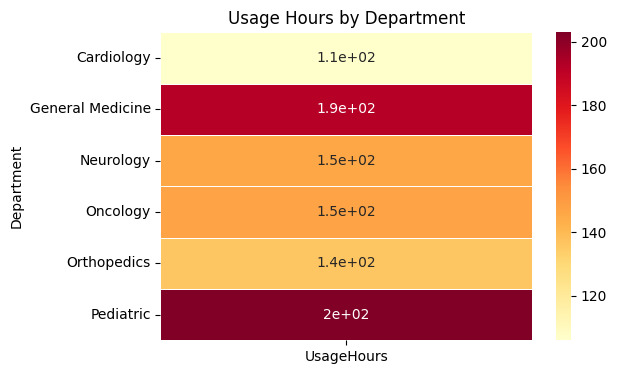

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your data
data = {
    'Department': [
        'Cardiology', 'General Medicine', 'Neurology',
        'Oncology', 'Orthopedics', 'Pediatric'
    ],
    'UsageHours': [106, 192, 146, 147, 136, 203]
}

df = pd.DataFrame(data)
df.set_index('Department', inplace=True)

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='YlOrRd', cbar=True, linewidths=0.5)
plt.title('Usage Hours by Department')
plt.ylabel('Department')
plt.xlabel('')

plt.show()


### Step 2: Load and Explore the Data
Now, load the gss.csv dataset and take a first look at its structure and contents.

In [3]:
df = pd.read_csv('gss.csv')
print(df.tail())
print(df.dtypes)
print(df.isnull().sum())
print(df.info())

     index  age  educ     sex   race           polviews  polviews_num  \
950    995   38    16  female  white           moderate             4   
951    996   44    14  female  white           moderate             4   
952    997   39    19  female  white  extremely liberal             1   
953    998   71    18    male  white            liberal             2   
954    999   48    12    male  white           moderate             4   

           marijuana  marijuana01  
950  should be legal            1  
951  should be legal            1  
952  should be legal            1  
953  should be legal            1  
954  should be legal            1  
index            int64
age              int64
educ             int64
sex             object
race            object
polviews        object
polviews_num     int64
marijuana       object
marijuana01      int64
dtype: object
index           0
age             0
educ            0
sex             0
race            0
polviews        0
polviews_num    

### Question: What do you notice about the data types? Are there any missing values indicated by the info() command?

### Step 3: Data Preprocessing and Cleaning
Real-world data is messy. We need to clean it before we can use it for modeling. Our focus will be on the columns age, educ, and polviews.

In [4]:
df_onehot = pd.get_dummies(df['polviews'], prefix='polviews')
print(df_onehot.head())

   polviews_conservative  polviews_extremely liberal  polviews_liberal  \
0                  False                       False             False   
1                  False                       False             False   
2                   True                       False             False   
3                  False                       False              True   
4                  False                       False             False   

   polviews_moderate  polviews_slightly conservative  \
0              False                           False   
1               True                           False   
2              False                           False   
3              False                           False   
4               True                           False   

   polviews_slightly liberal  
0                       True  
1                      False  
2                      False  
3                      False  
4                      False  


### Step 4: Define Features (X) and Target (y)

Separate your cleaned data into the feature matrix (X) and the target vector (y).

In [5]:
X = pd.concat([df[['age', 'educ']], df_onehot], axis=1)
y = df['marijuana01']

print(X.head(),y.head())

   age  educ  polviews_conservative  polviews_extremely liberal  \
0   60    16                  False                       False   
1   76    13                  False                       False   
2   61    16                   True                       False   
3   20    14                  False                       False   
4   56    14                  False                       False   

   polviews_liberal  polviews_moderate  polviews_slightly conservative  \
0             False              False                           False   
1             False               True                           False   
2             False              False                           False   
3              True              False                           False   
4             False               True                           False   

   polviews_slightly liberal  
0                       True  
1                      False  
2                      False  
3                      False

### Step 5: Split Data and Scale Features

Split the data into training and testing sets. Then, scale the features so they have a mean of 0 and a standard deviation of 1. This is crucial for k-NN!

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# Scale only 'age' and 'educ'
X_train_scaled_numeric = scaler.fit_transform(X_train[['age', 'educ']])
X_test_scaled_numeric = scaler.transform(X_test[['age', 'educ']])

# Convert back to DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled_numeric, columns=['age', 'educ'], index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_numeric, columns=['age', 'educ'], index=X_test.index)

# Get the one-hot encoded columns (everything except age and educ)
X_train_others = X_train.drop(columns=['age', 'educ'])
X_test_others = X_test.drop(columns=['age', 'educ'])

# Combine scaled numeric and one-hot columns
X_train_final = pd.concat([X_train_scaled_df, X_train_others], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_others], axis=1)

# Now safe to print
print("Head of final X_test after scaling:")
print(X_test_final.head())

Head of final X_test after scaling:
          age      educ  polviews_conservative  polviews_extremely liberal  \
199  0.219240 -1.019966                  False                       False   
422  1.485992  0.493883                   True                       False   
695  0.334399 -0.263041                  False                       False   
752 -1.853627 -1.019966                   True                       False   
388 -0.932353 -1.019966                  False                       False   

     polviews_liberal  polviews_moderate  polviews_slightly conservative  \
199              True              False                           False   
422             False              False                           False   
695             False               True                           False   
752             False              False                           False   
388             False               True                           False   

     polviews_slightly liberal  
199  

### Step 6: Train the k-NN Model

Now, it's time to train the k-NN classifier. Let's start with k=5.

In [8]:
# Initialize and train the k-NN model with k=5
print("Training 5-NN model...")
knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn5.fit(X_train_final, y_train)
print("5-NN model trained.")

Training 5-NN model...
5-NN model trained.


### Step 7: Evaluate the Model
Make predictions on the test data and evaluate the model's performance.

In [9]:
y_pred5 = knn5.predict(X_test_final)
print("\nPredictions generated for both models.")

print(y_pred5)
print(y_test)


Predictions generated for both models.
[1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1]
199    1
422    0
695    1
752    1
388    1
      ..
33     1
31     0
712    1
321    1
462    1
Name: marijuana01, Length: 191, dtype: int64


In [10]:
# Calculate and print the accuracy scores
accuracy5 = accuracy_score(y_test, y_pred5)

print("\n--- Overall Model Accuracy ---")
print(f"Accuracy of 5-NN model: {accuracy5:.4f}")
print("-" * 30)

# Generate and print the detailed classification report for the 5-NN model
print("\n--- Classification Report for 5-NN (k=5) ---")
print(classification_report(y_test, y_pred5))


--- Overall Model Accuracy ---
Accuracy of 5-NN model: 0.8115
------------------------------

--- Classification Report for 5-NN (k=5) ---
              precision    recall  f1-score   support

           0       0.54      0.39      0.45        38
           1       0.86      0.92      0.89       153

    accuracy                           0.81       191
   macro avg       0.70      0.65      0.67       191
weighted avg       0.79      0.81      0.80       191



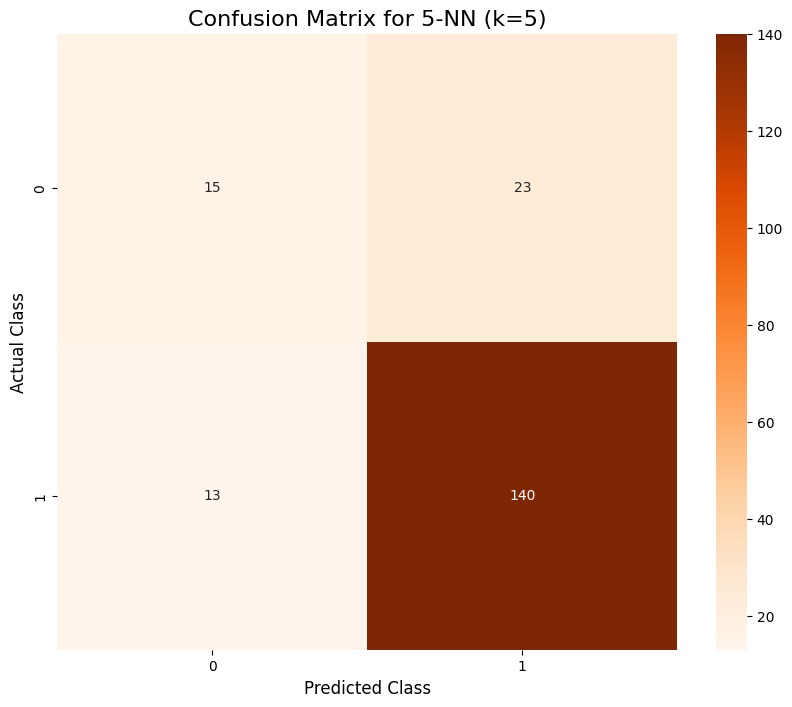

Displaying Confusion Matrix for 5-NN model...


In [11]:
# --- 6. Visualization ---

# Get the class names for labeling the confusion matrix plots
class_names = knn5.classes_

# Generate the confusion matrix for the 5-NN model
cm5 = confusion_matrix(y_test, y_pred5)

# Create a heatmap for the 5-NN confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for 5-NN (k=5)', fontsize=16)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()
print("Displaying Confusion Matrix for 5-NN model...")

## 4. Interpretation and Questions

#### 1.	Analyze the Accuracy: What is the accuracy of your model? Based on this number alone, would you say the model is performing well? Why might accuracy not be the only metric to consider?

#### 2.	Analyze the Classification Report: Look at the precision and recall for each class (Democrat, Independent, Republican). Is the model better at predicting one party than others?

#### 3.	Analyze the Confusion Matrix:
#### o	Which class had the most correct predictions (look at the diagonal)?
#### o	Which class was most often confused for another? (e.g., How many Republican voters were incorrectly classified as Independent?)


1. Accuracy Analysis:
The model’s accuracy is 81.15%, which means it correctly predicts about 8 out of 10 cases. While this is fairly good, accuracy alone doesn’t show class-specific performance. Since one class is much more frequent, metrics like precision and recall help reveal how well the model handles each class.

2. Classification Report Analysis:
The model is much better at predicting class 1 (support = 153), with high precision (0.86) and recall (0.92). The class are those who support legalization of marijuana. It performs poorly on class 0 (support = 38), with low precision (0.54) and recall (0.39). This means it often misclassifies class 0 examples.

3. Confusion Matrix Analysis:
Most correct predictions: Class 1 (those who support legalization of marijuana), with 140 correct predictions (bottom-right of the matrix).

Most confusion: Class 0 (those who believe marijuana should NOT be legalized) was most often confused for class 1 — 23 times (top-right cell), meaning class 0 was predicted as class 1.

## 5. Bonus Challenge

The choice of k is important. A small k can lead to a noisy, unstable model, while a large k can be too biased.


#### Challenge:
Create a loop that trains and tests the k-NN model for different values of k (e.g., from 1 to 20). Plot the accuracy for each k. What value of k gives the best performance on the test set?

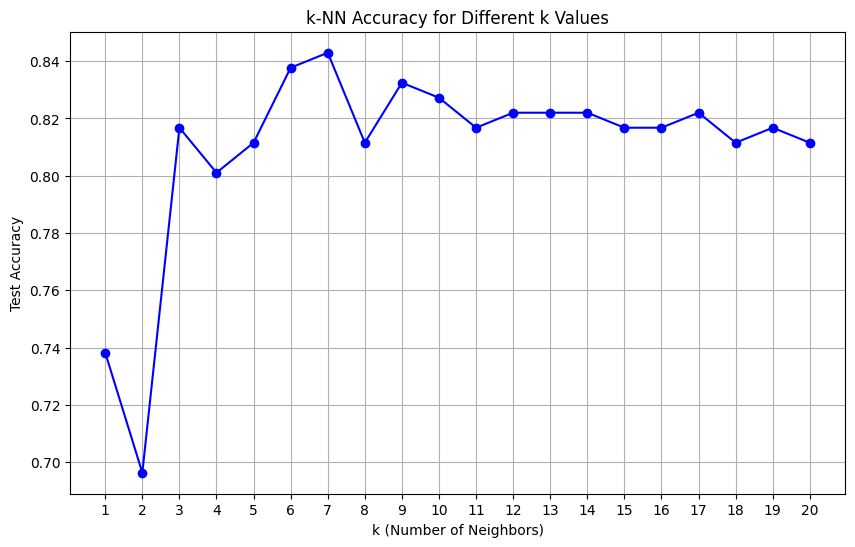

Best k: 7 with accuracy: 0.8429


In [14]:
# Store test accuracies for each k
k_values = range(1, 21)
accuracies = []

# Loop through k from 1 to 20
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_final, y_train)
    y_pred = knn.predict(X_test_final)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title("k-NN Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Test Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print best k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k: {best_k} with accuracy: {max(accuracies):.4f}")
